In [3]:
!pip install streamlit

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import classification_report, roc_auc_score
import streamlit as st


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 50.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing installation: tenacity 9.0.0
    Uninstalling tenacity-9.0.0:
      Successfully uninstalled tenacity-9.0.0


## **Funnel Analysis**

In [25]:
# Load the data
funnel = pd.read_excel('AssignmentData.xlsx', sheet_name='WorkerFunnel')

# Check for missing values
missing_values = funnel.isnull().sum()

# Handle missing data (e.g., fillna, dropna)
funnel.fillna(method='ffill', inplace=True)

# Check for duplicates and remove them
funnel.drop_duplicates(inplace=True)
print(funnel.columns)
funnel.head(1)



Index(['Date', 'Quarter', 'Department', 'Targeted Productivity', 'Overtime',
       'No. of Workers', 'Actual Productivity'],
      dtype='object')


<ipython-input-25-a282ea1d2568>:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  funnel.fillna(method='ffill', inplace=True)


,Date,Quarter,Department,Targeted Productivity,Overtime,No. of Workers,Actual Productivity
0,2015-01-01 00:00:00,Q1,Sewing,0.8,7080,59,0.940725


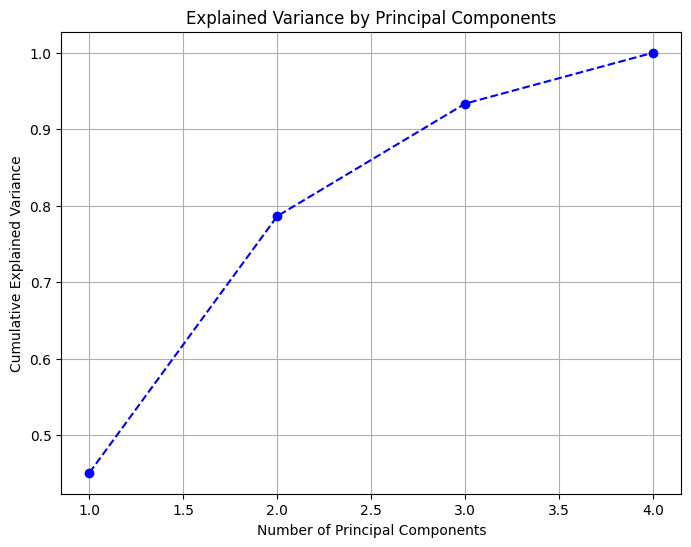

In [6]:
# Step 1: Handle non-numeric values and missing data
# Convert columns to numeric, coercing errors to NaN
for col in ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']:
    funnel[col] = pd.to_numeric(funnel[col], errors='coerce')

# Fill missing values with the median of each column
for col in ['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']:
    funnel[col].fillna(funnel[col].median(), inplace=True)

# Step 2: Standardize the features
scaler = StandardScaler()
funnel_scaled = scaler.fit_transform(funnel[['Targeted Productivity', 'Overtime', 'No. of Workers', 'Actual Productivity']])

# Step 3: Apply PCA
pca = PCA()
pca_funnel = pca.fit_transform(funnel_scaled)

# Step 4: Calculate the cumulative explained variance
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Step 5: Plot the explained variance
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Principal Components')
plt.grid(True)
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

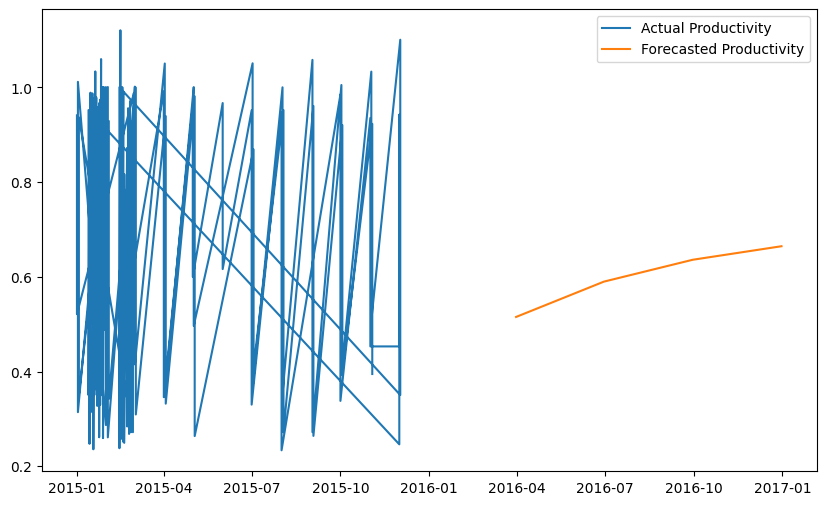

In [7]:
# Time series forecasting with ARIMA
funnel['Date'] = pd.to_datetime(funnel['Date'])
funnel.set_index('Date', inplace=True)

# Fit the ARIMA model
arima_model = ARIMA(funnel['Actual Productivity'], order=(1, 1, 1))
arima_fit = arima_model.fit()

# Forecast
forecast = arima_fit.forecast(steps=4)
forecast_dates = pd.date_range(start=funnel.index[-1], periods=5, freq='Q')[1:]

# Evaluate the model
mse = mean_squared_error(funnel['Actual Productivity'][-4:], forecast)
mape = mean_absolute_percentage_error(funnel['Actual Productivity'][-4:], forecast)

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(funnel.index, funnel['Actual Productivity'], label='Actual Productivity')
plt.plot(forecast_dates, forecast, label='Forecasted Productivity')
plt.legend()
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

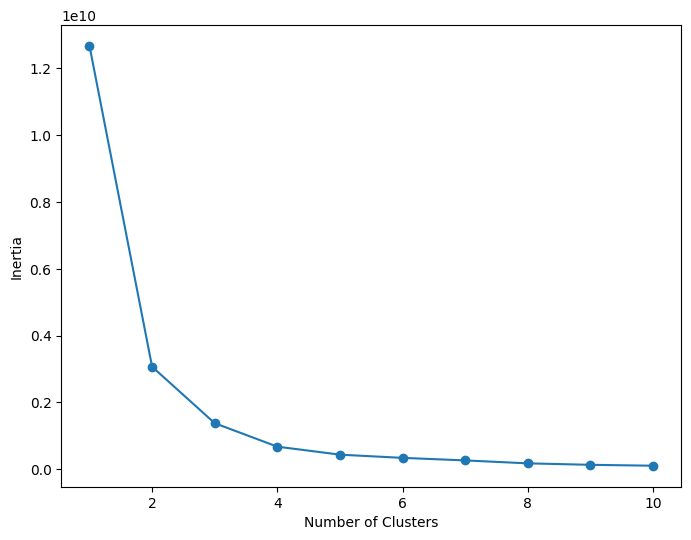

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


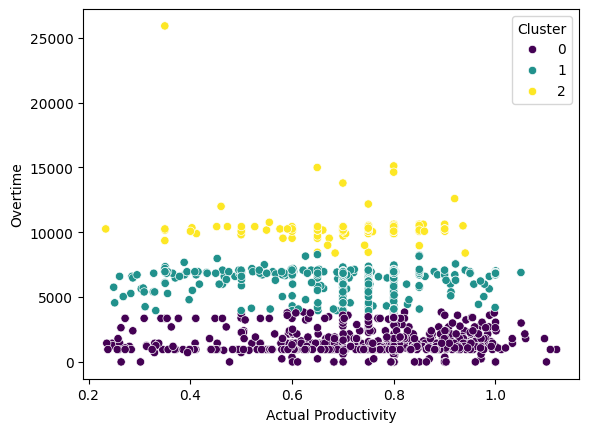

In [8]:
# K-Means Clustering
kmeans_data = funnel[['Actual Productivity', 'Overtime', 'No. of Workers']]

# Determine the optimal number of clusters using the Elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(kmeans_data)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Perform K-Means Clustering
kmeans = KMeans(n_clusters=3, random_state=42)
funnel['Cluster'] = kmeans.fit_predict(kmeans_data)

# Visualize the clusters
sns.scatterplot(x='Actual Productivity', y='Overtime', hue='Cluster', data=funnel, palette='viridis')
plt.show()


In [29]:
# Calculate Department Value
cost_per_minute = 10.0
funnel['No. of Workers'] = pd.to_numeric(funnel['No. of Workers'], errors='coerce')
funnel['Overtime'] = pd.to_numeric(funnel['Overtime'], errors='coerce')
funnel['Targeted Productivity'] = pd.to_numeric(funnel['Targeted Productivity'], errors='coerce')
funnel['Actual Productivity'] = pd.to_numeric(funnel['Actual Productivity'], errors='coerce')

funnel['Quarterly Spend'] = funnel['No. of Workers'] * funnel['Overtime'] * cost_per_minute



funnel['Department Value'] = funnel['Actual Productivity'] / funnel['Quarterly Spend']

# Suggest a revised budget (Example)
total_value = funnel.groupby('Department')['Department Value'].sum()
revised_budget = total_value / total_value.sum() * 8.4  # in lakhs


**Anomalt** **Detection**

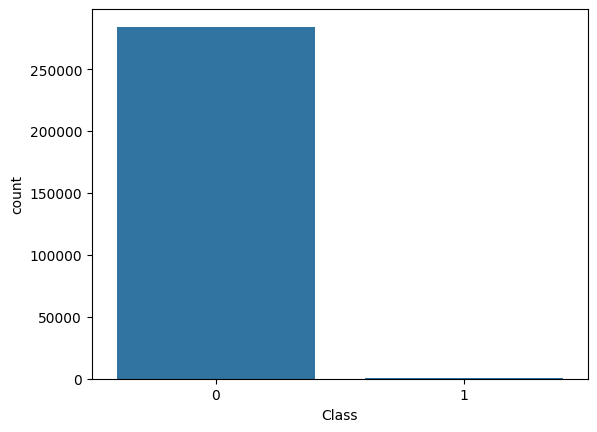

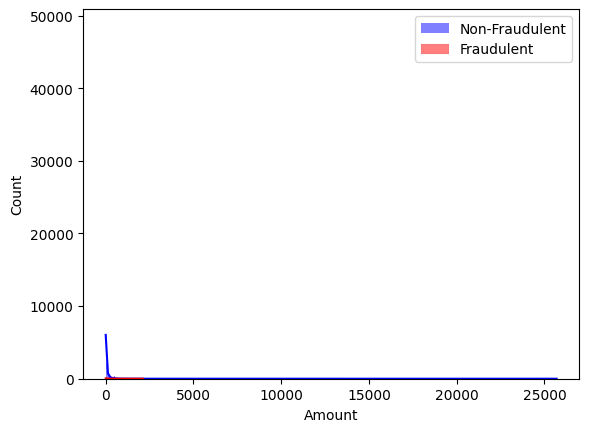

In [17]:
# Load the data
transactions = pd.read_excel('AssignmentData.xlsx', sheet_name='creditcard')

# EDA on the transactions
sns.countplot(x='Class', data=transactions)
plt.show()

# Visualize transaction amounts
sns.histplot(transactions[transactions['Class'] == 0]['Amount'], color='blue', label='Non-Fraudulent', kde=True)
sns.histplot(transactions[transactions['Class'] == 1]['Amount'], color='red', label='Fraudulent', kde=True)
plt.legend()
plt.show()


In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Feature scaling
scaler = StandardScaler()
transactions['Amount_scaled'] = scaler.fit_transform(transactions[['Amount']])
transactions['Time_scaled'] = scaler.fit_transform(transactions[['Time']])

# Select columns for PCA
columns = [f'V{i}' for i in range(1, 29)]  # ['V1', 'V2', ..., 'V28']

# Ensure all data in columns are numeric
transactions[columns] = transactions[columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values after conversion
transactions = transactions.dropna(subset=columns)

# Dimensionality reduction with PCA
pca = PCA(n_components=2)
transactions_pca = pca.fit_transform(transactions[columns])

# Add PCA components to DataFrame
transactions['PCA1'] = transactions_pca[:, 0]
transactions['PCA2'] = transactions_pca[:, 1]


In [21]:
# Isolation Forest
iso_forest = IsolationForest(contamination=0.001, random_state=42)
transactions['Anomaly_Iso'] = iso_forest.fit_predict(transactions[['PCA1', 'PCA2']])

# Local Outlier Factor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.001)
transactions['Anomaly_Lof'] = lof.fit_predict(transactions[['PCA1', 'PCA2']])

# Evaluate the models
print(classification_report(transactions['Class'], transactions['Anomaly_Iso']))
print(roc_auc_score(transactions['Class'], transactions['Anomaly_Iso']))


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00    284310
           1       0.00      1.00      0.00       492

    accuracy                           0.00    284802
   macro avg       0.00      0.33      0.00    284802
weighted avg       0.00      0.00      0.00    284802

0.5004976961767085


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

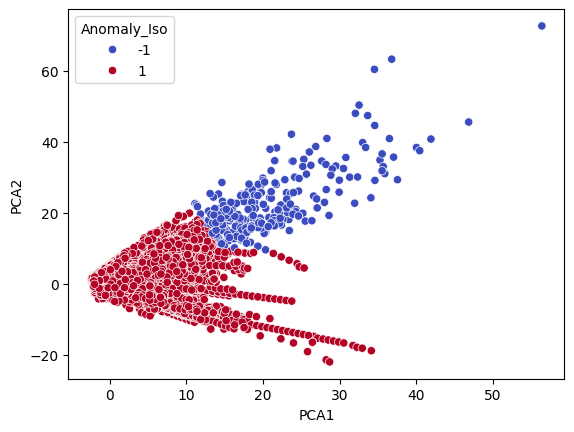

In [22]:
# Scatter plot for anomaly detection
sns.scatterplot(x='PCA1', y='PCA2', hue='Anomaly_Iso', data=transactions, palette='coolwarm')
plt.show()
